In [ ]:
import synapseclient

syn = synapseclient.Synapse()
# syn.login('synapse_username','password')

# Obtain a pointer and download the data
syn25956772 = syn.get(entity='syn25956772', version=3 )

# Get the path to the local copy of the data file
filepath = syn25956772.path

In [11]:
!unzip {filepath} -d ../data/.

Archive:  ../RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021.zip
   creating: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/
   creating: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000/
 extracting: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000/BraTS2021_00000_flair.nii.gz  
 extracting: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000/BraTS2021_00000_seg.nii.gz  
 extracting: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000/BraTS2021_00000_t1.nii.gz  
 extracting: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000/BraTS2021_00000_t1ce.nii.gz  
 extracting: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000/BraTS2021_00000_t2.nii.gz  
   creating: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00002/
 extracting: ../data/./RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS

In [3]:
import os
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [16]:
mgmt_labels_path = "../train_labels.csv"
df = pd.read_csv(mgmt_labels_path)
df.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [14]:
def get_volume_and_segmentation(patient_id_list: list, mgmt_label_list: list) -> pd.DataFrame:
    
    files_volume_paths = os.listdir("../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/")
    
    all_ids = [int(file.split("_")[-1]) for file in files_volume_paths]
    
    files = []
    labels = []
    
    for patient_id, mgmt_label in zip(patient_id_list, mgmt_label_list):
    
        try:

            index = all_ids.index(patient_id)

            files.append(files_volume_paths[index]) 
            labels.append(mgmt_label)
                
        except:

            print(f"Patient {patient_id} not found in BraTS task 1 data.")
            
    return pd.DataFrame(data={
        "files": files,
        "labels": labels
    })

In [17]:
df_with_path_and_label = get_volume_and_segmentation(df["BraTS21ID"].values, df["MGMT_value"].values)

Patient 169 not found in BraTS task 1 data.
Patient 197 not found in BraTS task 1 data.
Patient 245 not found in BraTS task 1 data.
Patient 308 not found in BraTS task 1 data.
Patient 408 not found in BraTS task 1 data.
Patient 564 not found in BraTS task 1 data.
Patient 794 not found in BraTS task 1 data.
Patient 998 not found in BraTS task 1 data.


In [18]:
df_with_path_and_label.head()

,files,labels
0,BraTS2021_00000,1
1,BraTS2021_00002,1
2,BraTS2021_00003,0
3,BraTS2021_00005,1
4,BraTS2021_00006,1


## Class balance

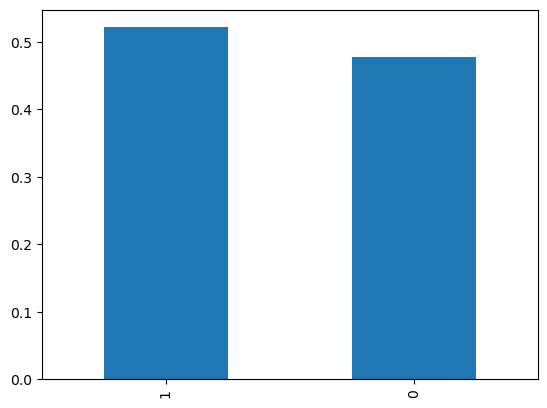

In [19]:
df_with_path_and_label["labels"].value_counts(normalize=True).plot.bar()
plt.show()

## Paths creation

In [20]:
df_with_path_and_label.head()

,files,labels
0,BraTS2021_00000,1
1,BraTS2021_00002,1
2,BraTS2021_00003,0
3,BraTS2021_00005,1
4,BraTS2021_00006,1


In [21]:
df_with_path_and_label["x"] = df_with_path_and_label["files"].apply(lambda x: f"../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/{x}/{x}_t2.nii.gz")
df_with_path_and_label["y"] = df_with_path_and_label["files"].apply(lambda x: f"../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/{x}/{x}_seg.nii.gz")

In [22]:
df_with_path_and_label.head()

,files,labels,x,y
0,BraTS2021_00000,1,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...
1,BraTS2021_00002,1,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...
2,BraTS2021_00003,0,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...
3,BraTS2021_00005,1,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...
4,BraTS2021_00006,1,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...,../data/RSNA_ASNR_MICCAI_BraTS2021_TrainingDat...


In [26]:
df_with_path_and_label.to_csv("../MGMT.csv", index=False)

In [27]:
def get_data(img):
    
    data = img.get_fdata()
    
    for i, aff in enumerate(np.diag(img.affine)[:-1]):
        if aff < 0:
            data = np.flip(data, axis=i)

    return data

In [28]:
x = nib.load(df_with_path_and_label["x"].values[0])
x = get_data(x)

y = nib.load(df_with_path_and_label["y"].values[0])
y = get_data(y)


In [29]:
# x_t = x.transpose(2, 0, 1)
# y_t = y.transpose(2, 0, 1)

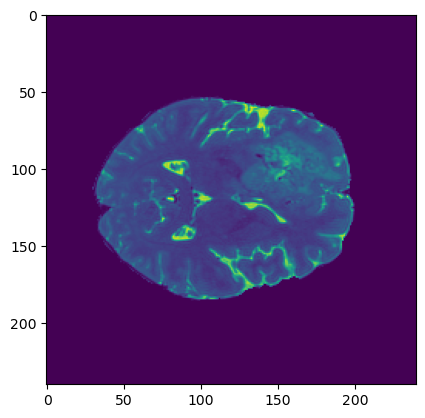

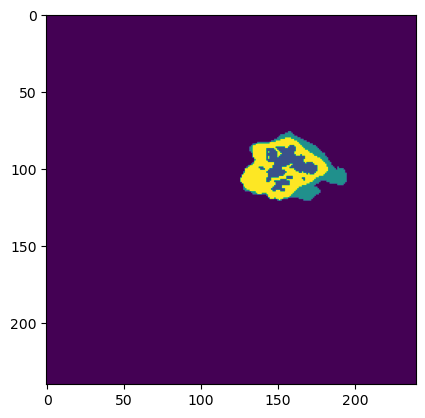

In [30]:
plt.imshow(x[:, :, 75])
plt.show()

plt.imshow(y[:, :, 75])
plt.show()